# Bank API

## Banks
### Create bank. Print information about bank

In [1]:
from banking.banks import (Bank, get_all_banks)
bank = Bank("OOO Roga and kopyta")
print(bank)

Bank: OOO Roga and kopyta. Id: d56dd55c-8c3b-46db-9946-b711409a9654


### Get all banks
All banks stores in global scope variable and can retrieved using get_all_banks()

In [2]:
for bank in get_all_banks():
    print(bank)

Bank: OOO Roga and kopyta. Id: d56dd55c-8c3b-46db-9946-b711409a9654


## Currency

In [3]:
from banking.currency import Currency

usd = Currency("USA Dollar", "usd")
bank.add_currency(usd)

euro = Currency("Euro", "eur")
bank.add_currency(euro)

Currency(Euro, EUR)

In [4]:
for currency in bank.currency_list:
    print(currency)

Currency: Euro. Code: EUR
Currency: USA Dollar. Code: USD


In [5]:
usd = bank.get_currency('Usd')
bank.set_currency_price(usd, 60)

bank.set_currency_price('eur', 80)
bank.set_currency_price('eur', 79)
bank.set_currency_price('eur', 80.2)

for currency_price in bank.current_currencies:
    print(currency_price)

Currency: [Currency: Euro. Code: EUR]. Price: 80.2 (at: 2016-12-07 19:24:11.284793)
Currency: [Currency: USA Dollar. Code: USD]. Price: 60 (at: 2016-12-07 19:24:11.284631)


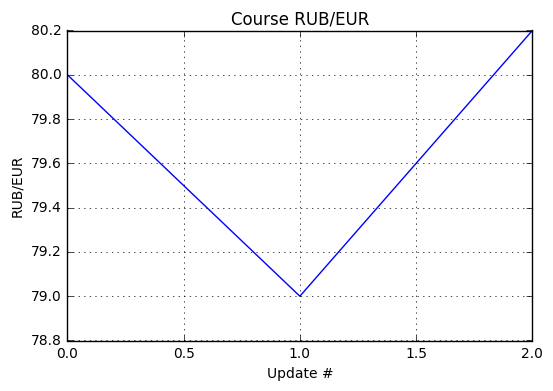

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

history = bank.get_currency_history('eur')
history_map = enumerate(cp.price for cp in history)
keys, values = zip(*history_map)

plt.plot(keys, values) 
plt.ylabel('RUB/EUR')
plt.xlabel('Update #')
plt.title('Course RUB/EUR')
plt.grid(True)

## Clients

In [7]:
jonny = bank.add_client("Jonny")
alex = bank.add_client("Alex")
for client in bank.clients:
    print(client)

Client: Jonny. ID:10700b12-fdd4-417f-a198-78038f82331c. Bank: OOO Roga and kopyta [d56dd55c-8c3b-46db-9946-b711409a9654]
Client: Alex. ID:43672fc1-cf59-4b42-b135-2747d9edc791. Bank: OOO Roga and kopyta [d56dd55c-8c3b-46db-9946-b711409a9654]


## Accounts

In [8]:
jonny_rub = bank.add_account(jonny)
jonny_usd = bank.add_account(jonny, 20, 'usd')

alex_rub = bank.add_account(alex, 40)
alex_usd = bank.add_account(alex, 0.1, 'usd')

for account in bank.accounts:
    print(account)


Jonny's account in OOO Roga and kopyta bank. Amount: 20. Currency: Currency: USA Dollar. Code: USD
Jonny's account in OOO Roga and kopyta bank. Amount: 0. Currency: -
Alex's account in OOO Roga and kopyta bank. Amount: 40. Currency: -
Alex's account in OOO Roga and kopyta bank. Amount: 0.1. Currency: Currency: USA Dollar. Code: USD


In [9]:
transactions = bank.transactions
for transaction in transactions:
    print("> %s" % transaction)

> 212f90e3-cc93-41c4-9199-94f4c4985776 Currency transaction from BANK to Jonny's account in OOO Roga and kopyta bank. Amount: 20. Time: 2016-12-07 19:24:13.591091. Currency: Currency: USA Dollar. Code: USD (course: 60). Approved = True
> c201fddb-67f4-45bc-bdad-834e462bfc4a Transaction from BANK to Alex's account in OOO Roga and kopyta bank. Amount: 40. Time: 2016-12-07 19:24:13.591378
> 7b711c32-f57f-4e25-a29b-2c34f0cae1c4 Currency transaction from BANK to Alex's account in OOO Roga and kopyta bank. Amount: 0.1. Time: 2016-12-07 19:24:13.591653. Currency: Currency: USA Dollar. Code: USD (course: 60). Approved = True


In [10]:
alex_transactions = alex.history
for transaction in alex_transactions:
    print("> %s" % transaction)

> c201fddb-67f4-45bc-bdad-834e462bfc4a Transaction from BANK to Alex's account in OOO Roga and kopyta bank. Amount: 40. Time: 2016-12-07 19:24:13.591378
> 7b711c32-f57f-4e25-a29b-2c34f0cae1c4 Currency transaction from BANK to Alex's account in OOO Roga and kopyta bank. Amount: 0.1. Time: 2016-12-07 19:24:13.591653. Currency: Currency: USA Dollar. Code: USD (course: 60). Approved = True


In [11]:
print("Bank full amount is: %s " % bank.full_amount)

Bank full amount is: 1246.0 


### Transfer between accounts

In [12]:
alex_rub.transfer(jonny_rub, 10)
for transaction in bank.transactions:
    print("> %s" % transaction)
    
print("Bank full amount is: %s " % bank.full_amount)

for account in bank.accounts:
    print(account)
    
for client in bank.clients:
    print("%s has money: %s RUB" % (client, client.full_amount))

> 212f90e3-cc93-41c4-9199-94f4c4985776 Currency transaction from BANK to Jonny's account in OOO Roga and kopyta bank. Amount: 20. Time: 2016-12-07 19:24:13.591091. Currency: Currency: USA Dollar. Code: USD (course: 60). Approved = True
> c201fddb-67f4-45bc-bdad-834e462bfc4a Transaction from BANK to Alex's account in OOO Roga and kopyta bank. Amount: 40. Time: 2016-12-07 19:24:13.591378
> 7b711c32-f57f-4e25-a29b-2c34f0cae1c4 Currency transaction from BANK to Alex's account in OOO Roga and kopyta bank. Amount: 0.1. Time: 2016-12-07 19:24:13.591653. Currency: Currency: USA Dollar. Code: USD (course: 60). Approved = True
> d870c594-57c7-4e9f-bae1-1a772e53b4df Transaction from Alex's account in OOO Roga and kopyta bank to Jonny's account in OOO Roga and kopyta bank. Amount: 10. Time: 2016-12-07 19:24:14.059192
Bank full amount is: 1246.0 
Jonny's account in OOO Roga and kopyta bank. Amount: 20. Currency: Currency: USA Dollar. Code: USD
Jonny's account in OOO Roga and kopyta bank. Amount: 10

### Transfer between currencies accounts

In [13]:
transaction = jonny_usd.transfer(alex_usd, 1)

print("UPAPPROVED TRANSACTIONS")
for transaction in bank.unapproved_transactions:
    print("> %s" % transaction) 
    
print("BEFORE APPROVE")
for account in bank.accounts:
    print(account)
    
print("APPROVING")    
unfinished = bank.get_transaction(transaction.id)
unfinished.approve()

print("AFTER APPROVE")
print("ALL TRANSACTIONS")
for transaction in bank.transactions:
    print("> %s" % transaction)

for account in bank.accounts:
    print(account)

UPAPPROVED TRANSACTIONS
> 27dcf649-5f66-4fe5-810d-23ea39ab9d5f Currency transaction from Jonny's account in OOO Roga and kopyta bank to Alex's account in OOO Roga and kopyta bank. Amount: 1. Time: 2016-12-07 19:24:14.159201. Currency: Currency: USA Dollar. Code: USD (course: 60). Approved = False
BEFORE APPROVE
Jonny's account in OOO Roga and kopyta bank. Amount: 19. Currency: Currency: USA Dollar. Code: USD
Jonny's account in OOO Roga and kopyta bank. Amount: 10. Currency: -
Alex's account in OOO Roga and kopyta bank. Amount: 30. Currency: -
Alex's account in OOO Roga and kopyta bank. Amount: 0.1. Currency: Currency: USA Dollar. Code: USD
APPROVING
AFTER APPROVE
ALL TRANSACTIONS
> 212f90e3-cc93-41c4-9199-94f4c4985776 Currency transaction from BANK to Jonny's account in OOO Roga and kopyta bank. Amount: 20. Time: 2016-12-07 19:24:13.591091. Currency: Currency: USA Dollar. Code: USD (course: 60). Approved = True
> c201fddb-67f4-45bc-bdad-834e462bfc4a Transaction from BANK to Alex's acco

### Transfer between different currencies

In [14]:
transaction = jonny_usd.transfer(alex_rub, 1)

print("UPAPPROVED TRANSACTIONS")
for transaction in bank.unapproved_transactions:
    print("> %s" % transaction) 
    
print("BEFORE APPROVE")
for account in bank.accounts:
    print(account)
    
print("APPROVING")    
unfinished = bank.get_transaction(transaction.id)
unfinished.approve()

print("AFTER APPROVE")
print("ALL TRANSACTIONS")
for transaction in bank.transactions:
    print("> %s" % transaction)

for account in bank.accounts:
    print(account)

UPAPPROVED TRANSACTIONS
> bf86c43f-2a0a-4ade-bffb-faf49d2e5c0d Currency transaction from Jonny's account in OOO Roga and kopyta bank to Alex's account in OOO Roga and kopyta bank. Amount: 60. Time: 2016-12-07 19:24:14.259526. Currency: Currency: USA Dollar. Code: USD (course: 60). Approved = False
BEFORE APPROVE
Jonny's account in OOO Roga and kopyta bank. Amount: 18. Currency: Currency: USA Dollar. Code: USD
Jonny's account in OOO Roga and kopyta bank. Amount: 10. Currency: -
Alex's account in OOO Roga and kopyta bank. Amount: 30. Currency: -
Alex's account in OOO Roga and kopyta bank. Amount: 1.1. Currency: Currency: USA Dollar. Code: USD
APPROVING
AFTER APPROVE
ALL TRANSACTIONS
> 212f90e3-cc93-41c4-9199-94f4c4985776 Currency transaction from BANK to Jonny's account in OOO Roga and kopyta bank. Amount: 20. Time: 2016-12-07 19:24:13.591091. Currency: Currency: USA Dollar. Code: USD (course: 60). Approved = True
> c201fddb-67f4-45bc-bdad-834e462bfc4a Transaction from BANK to Alex's acc